   <center><font size="5"><b>Christopher Tedeschi - County Data and Presidential Voting Trends</b></font></center>

**Introduction**

This project examines how various United States county factors effect presidential voting. Examples of these factors include per capita income, race, and age. Because the Democratic and Republican political parties had a clear majority of votes, I excluded votes for other presidential parties and write-in votes when collecting data.
In particular, this project seeks to examine how various factors affect the likelihood that a county voted majority Republican over the past five elections.
This research shows that there is a significant difference in many of these factors between Republican counties and Democratic counties. 

**Dataset Creation**


I will be using two datasets to understand how various county factors effect presidential voting. The first data set was collected from the US Atlas of Rural and Small Town America. This dataset had a huge number of variables, so I used Excel to copy and paste columns to create a new CSV file with those that are most important. The second dataset was created by the US Government and made public by MIT in a CSV format. It consists of voting information by county for the 2000 - 2016 presidential elections. To create the final dataset, I will use for analysis, I will combine these datasets into one. The remainder of this section demonstrates the process I used to do this.

First, I imported all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sn

Next, I imported both the census data and voting data as Pandas DataFrames.

In [2]:
census_df = pd.read_csv('final_census_data.csv')
voting_df = pd.read_csv('election_data.csv')

*The first five rows of the census dataframe.*

In [3]:
census_df.head()

,FIPS,State,County,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010
0,1001,AL,Autauga,59338,29372,19.3,13.8,91.80,26.78,12.00,77.25,17.58,0.86,0.40,2.40,1.59,2.018116,74.894625,54571,8.9
1,1003,AL,Baldwin,57588,31203,13.9,9.8,114.65,22.99,16.77,83.50,9.31,0.74,0.63,4.38,1.49,3.445343,73.619343,182265,10.0
2,1005,AL,Barbour,34382,18461,43.9,30.9,31.03,21.91,14.24,46.75,46.69,0.39,0.22,5.05,0.94,2.505624,61.397779,27457,12.3
3,1007,AL,Bibb,46064,20199,27.8,21.8,36.81,22.70,12.68,75.02,21.92,0.10,0.28,1.77,0.89,1.442713,75.073099,22915,11.4
4,1009,AL,Blount,50412,22656,18.0,13.2,88.90,24.61,14.72,88.89,1.26,0.20,0.50,8.07,1.19,4.359441,78.626214,57322,9.8


*The first five rows of the voting dataframe.*

In [4]:
voting_df.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes
0,2000,Alabama,AL,Autauga,1001,President,Al Gore,democrat,4942.0,17208
1,2000,Alabama,AL,Autauga,1001,President,George W. Bush,republican,11993.0,17208
2,2000,Alabama,AL,Autauga,1001,President,Ralph Nader,green,160.0,17208
3,2000,Alabama,AL,Autauga,1001,President,Other,NaN,113.0,17208
4,2000,Alabama,AL,Baldwin,1003,President,Al Gore,democrat,13997.0,56480


Then, I created six new columns in the census dataframe. These dataframes will hold information on the number of votes, the percentages of votes, and a boolean on whether a county voted majority Republican (0,1). These columns were all created with a default value of zero. The first five rows of the updated dataframe are shown below.

In [5]:
census_df['DemocraticVoteCount'] = 0
census_df['RepublicanVoteCount'] = 0
census_df['DemAndRepVoteCount'] = 0
census_df['RepublicanPct'] = 0
census_df['DemocraticPct'] = 0
census_df['Republican?'] = 0
census_df.head()

,FIPS,State,County,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,...,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010,DemocraticVoteCount,RepublicanVoteCount,DemAndRepVoteCount,RepublicanPct,DemocraticPct,Republican?
0,1001,AL,Autauga,59338,29372,19.3,13.8,91.80,26.78,12.00,...,2.018116,74.894625,54571,8.9,0,0,0,0,0,0
1,1003,AL,Baldwin,57588,31203,13.9,9.8,114.65,22.99,16.77,...,3.445343,73.619343,182265,10.0,0,0,0,0,0,0
2,1005,AL,Barbour,34382,18461,43.9,30.9,31.03,21.91,14.24,...,2.505624,61.397779,27457,12.3,0,0,0,0,0,0
3,1007,AL,Bibb,46064,20199,27.8,21.8,36.81,22.70,12.68,...,1.442713,75.073099,22915,11.4,0,0,0,0,0,0
4,1009,AL,Blount,50412,22656,18.0,13.2,88.90,24.61,14.72,...,4.359441,78.626214,57322,9.8,0,0,0,0,0,0


Next, I wrote this script which fills in three of the six new columns in the census dataframe. It does this by looping through the columns of both the voting dataframe and census dataframe and comparing them using the FIPS code and a dummy variable current year. This fills in the first two columns, respectively. Then, the third column, respectively, is calculated as the sum of the two previous columns and filled in.

In [6]:
f1 = 0 # row placeholder for census_df
f2 = 0 # row placeholder for voting_df
currentYear = 2000 #keeps track of which election the data being processed is from
while (f2 < len(voting_df) - 1): # loops over all rows in voting_df
    if (census_df['FIPS'].iloc[f1] < voting_df['FIPS'].iloc[f2]):
        f1 += 1
    if (census_df['FIPS'].iloc[f1] == voting_df['FIPS'].iloc[f2]):
        if (voting_df['party'].iloc[f2] == 'democrat'):
            census_df['DemocraticVoteCount'].iloc[f1] += voting_df['candidatevotes'].iloc[f2] # sums votes from each election year 
        if (voting_df['party'].iloc[f2] == 'republican'):
            census_df['RepublicanVoteCount'].iloc[f1] += voting_df['candidatevotes'].iloc[f2] # sums votes from each election year
        f2 += 1
    if (census_df['FIPS'].iloc[f1] > voting_df['FIPS'].iloc[f2]):
        f2 += 1
    if (voting_df['year'].iloc[f2] != currentYear): # resets placeholder at 0 for census_df after each year is over
        f1 = 0
        currentYear += 4
        
census_df['DemAndRepVoteCount'] = census_df['RepublicanVoteCount'] + census_df['DemocraticVoteCount'] # Calculates total Democratic and Republican Votes

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Now, the vote count columns are full.

In [7]:
print("The dataframe has " + str(len(census_df)) + " rows.")
census_df.head()

The dataframe has 3141 rows.


,FIPS,State,County,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,...,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010,DemocraticVoteCount,RepublicanVoteCount,DemAndRepVoteCount,RepublicanPct,DemocraticPct,Republican?
0,1001,AL,Autauga,59338,29372,19.3,13.8,91.80,26.78,12.00,...,2.018116,74.894625,54571,8.9,4942.0,80143.0,85085.0,0,0,0
1,1003,AL,Baldwin,57588,31203,13.9,9.8,114.65,22.99,16.77,...,3.445343,73.619343,182265,10.0,85864.0,294013.0,379877.0,0,0,0
2,1005,AL,Barbour,34382,18461,43.9,30.9,31.03,21.91,14.24,...,2.505624,61.397779,27457,12.3,26500.0,27865.0,54365.0,0,0,0
3,1007,AL,Bibb,46064,20199,27.8,21.8,36.81,22.70,12.68,...,1.442713,75.073099,22915,11.4,11174.0,28877.0,40051.0,0,0,0
4,1009,AL,Blount,50412,22656,18.0,13.2,88.90,24.61,14.72,...,4.359441,78.626214,57322,9.8,17563.0,94058.0,111621.0,0,0,0


I then checked the minimum of the DemAndRepVoteCount column to ensure all counties had a vote count greater than zero.

In [8]:
census_df['DemAndRepVoteCount'].min()

0.0

Unfortunately, a small number of rows in the dataset do not have voting counts. Therefore, these rows are removed. This is done by creating a filtered view of the dataset, copying this filtered view, and assigning it to a new dataframe. I named this new dataframe filtered_df. The first five rows of the filtered dataframe and its total number of rows are shown.

In [9]:
filtered_df = census_df[census_df['DemAndRepVoteCount'] != 0]
print("The dataframe has " + str(len(filtered_df)) + " rows.")
filtered_df.head()

The dataframe has 3110 rows.


,FIPS,State,County,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,...,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010,DemocraticVoteCount,RepublicanVoteCount,DemAndRepVoteCount,RepublicanPct,DemocraticPct,Republican?
0,1001,AL,Autauga,59338,29372,19.3,13.8,91.80,26.78,12.00,...,2.018116,74.894625,54571,8.9,4942.0,80143.0,85085.0,0,0,0
1,1003,AL,Baldwin,57588,31203,13.9,9.8,114.65,22.99,16.77,...,3.445343,73.619343,182265,10.0,85864.0,294013.0,379877.0,0,0,0
2,1005,AL,Barbour,34382,18461,43.9,30.9,31.03,21.91,14.24,...,2.505624,61.397779,27457,12.3,26500.0,27865.0,54365.0,0,0,0
3,1007,AL,Bibb,46064,20199,27.8,21.8,36.81,22.70,12.68,...,1.442713,75.073099,22915,11.4,11174.0,28877.0,40051.0,0,0,0
4,1009,AL,Blount,50412,22656,18.0,13.2,88.90,24.61,14.72,...,4.359441,78.626214,57322,9.8,17563.0,94058.0,111621.0,0,0,0


Filtering this dataset removed 31 columns (3141 columns - 3110 columns) without a vote count.

I then calculated the values for the remaining three new columns and updated the dataset.

In [10]:
filtered_df['RepublicanPct'] = (filtered_df['RepublicanVoteCount'] / filtered_df['DemAndRepVoteCount']) * 100 # Calculates Republican % of votes
filtered_df['DemocraticPct'] = (filtered_df['DemocraticVoteCount'] / filtered_df['DemAndRepVoteCount']) * 100 # Calculates Democratic % of votes
filtered_df["Republican?"] = np.where(filtered_df['RepublicanPct']>50, 1, 0) # Calculates if a county is mostly Republican. (1 for yes, 0 for no)
filtered_df['RepublicanPct'] = filtered_df['RepublicanPct'].round(3)
filtered_df['DemocraticPct'] = filtered_df['DemocraticPct'].round(3)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Now, the dataframe filtered_df is complete and ready to be used for analysis. I renamed it final_df to avoid any confusion when further filtering datasets during analysis. The first five rows are printed below.

In [11]:
final_df = filtered_df.copy()
final_df.head()

,FIPS,State,County,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,...,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010,DemocraticVoteCount,RepublicanVoteCount,DemAndRepVoteCount,RepublicanPct,DemocraticPct,Republican?
0,1001,AL,Autauga,59338,29372,19.3,13.8,91.80,26.78,12.00,...,2.018116,74.894625,54571,8.9,4942.0,80143.0,85085.0,94.192,5.808,1
1,1003,AL,Baldwin,57588,31203,13.9,9.8,114.65,22.99,16.77,...,3.445343,73.619343,182265,10.0,85864.0,294013.0,379877.0,77.397,22.603,1
2,1005,AL,Barbour,34382,18461,43.9,30.9,31.03,21.91,14.24,...,2.505624,61.397779,27457,12.3,26500.0,27865.0,54365.0,51.255,48.745,1
3,1007,AL,Bibb,46064,20199,27.8,21.8,36.81,22.70,12.68,...,1.442713,75.073099,22915,11.4,11174.0,28877.0,40051.0,72.101,27.899,1
4,1009,AL,Blount,50412,22656,18.0,13.2,88.90,24.61,14.72,...,4.359441,78.626214,57322,9.8,17563.0,94058.0,111621.0,84.266,15.734,1


**Data Description** 

The observations in the dataset are various US counties and the attributes are different factors pertaining to each county. The additional six columns added contain data about whether a county voted democrat or republican including raw counts, percentages, and a conditional dummy variable where all data is a 0 or 1. 

Both datasets were created for national studies and funded by the government. The first dataset was created to track county information for all counties in the US. The second dataset was created to track vote counts for each US county in the presidential elections. MIT then aggregated the data for the 2000 - 2016 elections into one dataset. There are no processes I can think of that would influence the data observed and recorded.

Both datasets were preprocessed so that they would be easily understood and used. Both datasets were sorted by FIPS codes which made combining them easy. I personally processed the data so that only counties with information on all variables was included. Additionally, I only included votes for the Democratic and Republican party. This may affect analysis because votes for other parties like the Green Party are not counted. Lastly, I aggregated all the election voting data into one column. This allows me to see a big picture but does not account for disparities between election years.

People were aware of the data collections at a county level. They expected the data to be used for important government and political purposes. Therefore, I know the data was carefully created and overall reliable.

**Data Sources**

First Dataset (Census): https://www.ers.usda.gov/data-products/atlas-of-rural-and-small-town-america/

Second Dataset (Voting): https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

**Data Analysis**

I began analyzing the data by printing the summary statistics of all the variables in my dataframe.

In [12]:
final_df.describe()

,FIPS,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,...,ForeignBornPct,OwnHomePct,TotalPop2010,UnempRate2010,DemocraticVoteCount,RepublicanVoteCount,DemAndRepVoteCount,RepublicanPct,DemocraticPct,Republican?
count,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,...,3110.000000,3110.000000,3.110000e+03,3110.000000,3.110000e+03,3.110000e+03,3.110000e+03,3110.000000,3110.000000,3110.000000
mean,30645.318328,52696.249839,26984.035370,21.122958,15.158746,261.705167,23.402913,15.948617,78.615704,8.824418,...,4.694949,71.532609,9.902738e+04,9.360064,9.960631e+04,9.479379e+04,1.944001e+05,60.945968,39.054032,0.805145
std,14986.700935,13835.489256,6459.960091,8.864265,6.072909,1733.066930,3.291461,4.131412,19.535558,14.474005,...,5.664775,8.112618,3.144148e+05,3.155271,3.537136e+05,2.180581e+05,5.538595e+05,13.539060,13.539060,0.396153
min,1001.000000,25385.000000,10931.000000,2.500000,2.600000,0.120000,9.110000,3.730000,2.860000,0.000000,...,0.000000,19.607266,8.200000e+01,2.100000,5.000000e+01,3.680000e+02,4.340000e+02,7.198000,5.808000,0.000000
25%,19037.500000,43653.000000,22757.750000,14.600000,10.900000,17.700000,21.422500,13.200000,67.260000,0.410000,...,1.348948,67.684551,1.130850e+04,7.200000,8.080250e+03,1.463650e+04,2.351050e+04,52.879500,29.509250,1.000000
50%,29206.000000,50530.500000,26219.000000,20.100000,14.100000,45.735000,23.310000,15.600000,85.930000,1.935000,...,2.712302,72.666520,2.605050e+04,9.200000,1.979350e+04,3.174900e+04,5.165900e+04,62.046000,37.954000,1.000000
75%,46004.500000,58643.750000,29997.250000,26.300000,18.300000,115.325000,25.087500,18.247500,94.260000,10.007500,...,5.679957,77.059199,6.708750e+04,11.375000,5.381950e+04,8.006800e+04,1.345950e+05,70.490750,47.120500,1.000000
max,56045.000000,140382.000000,72832.000000,68.300000,48.400000,69468.420000,40.130000,43.380000,99.160000,85.440000,...,53.254041,92.396814,9.818605e+06,28.800000,1.059536e+07,4.559656e+06,1.515502e+07,94.192000,92.802000,1.000000



My first step in analyzing the data is to create histograms of all the numerical variables. This reveals additional properties of the variable that are not seen in the summary statistics and helps check for outliers.

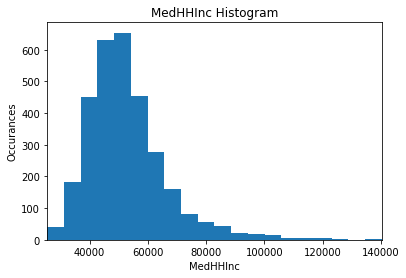

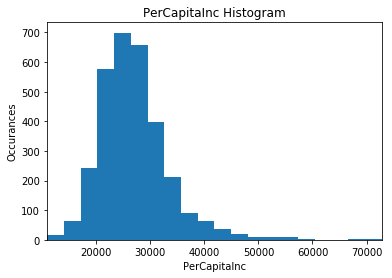

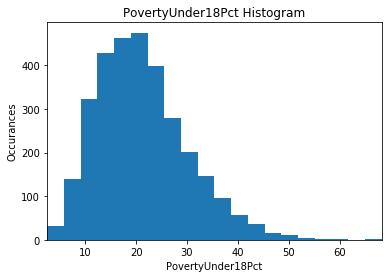

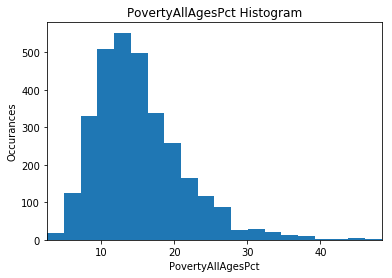

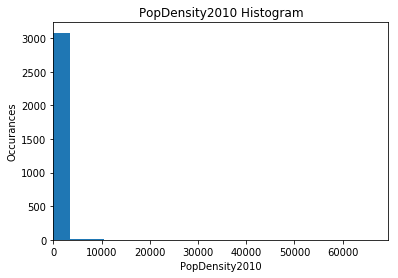

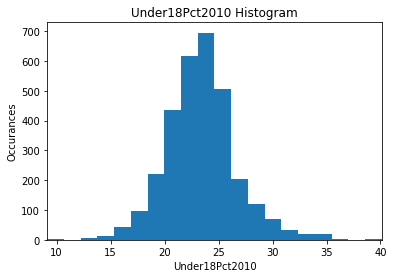

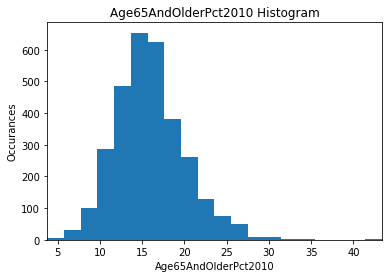

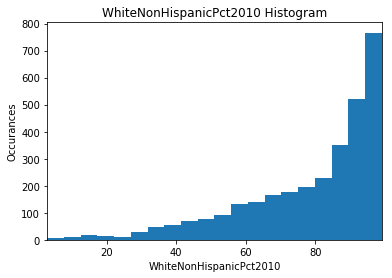

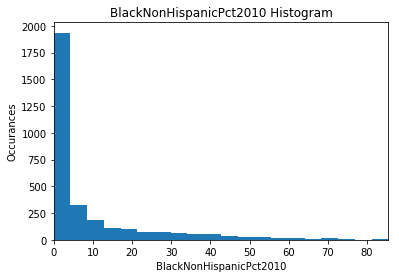

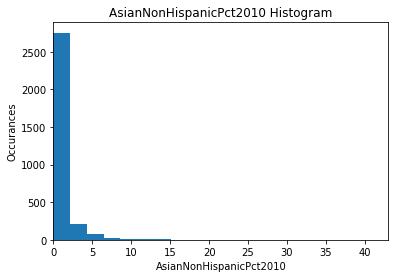

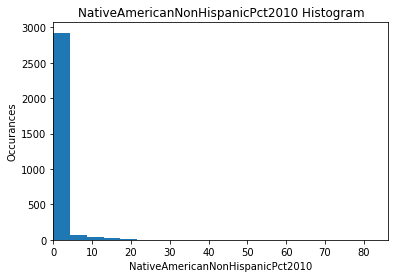

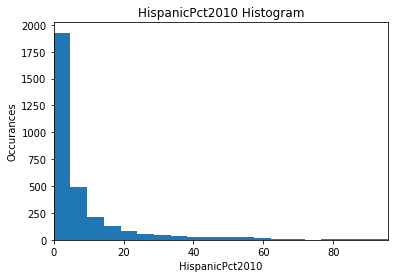

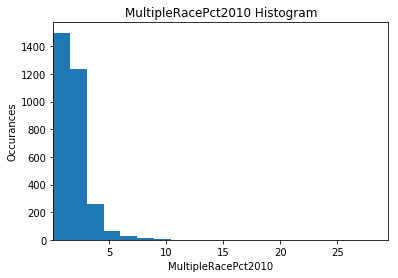

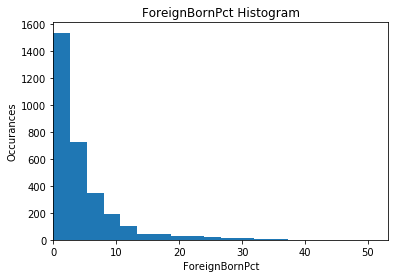

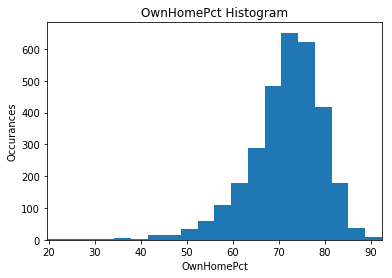

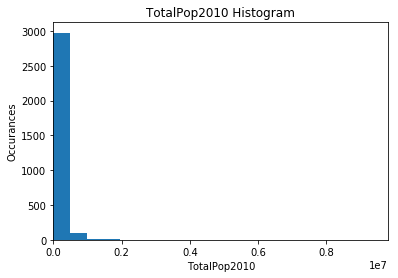

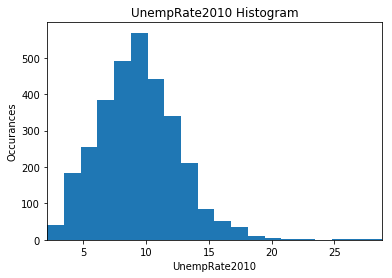

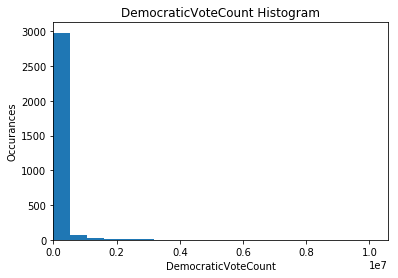

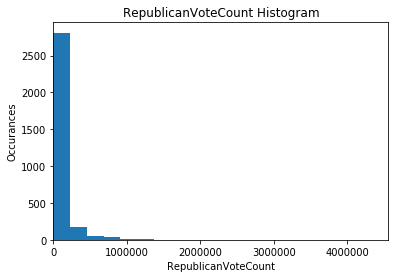

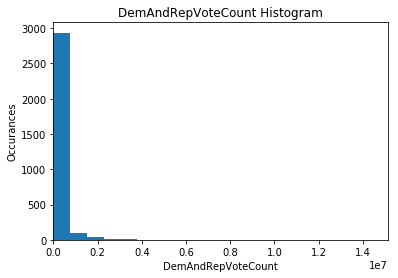

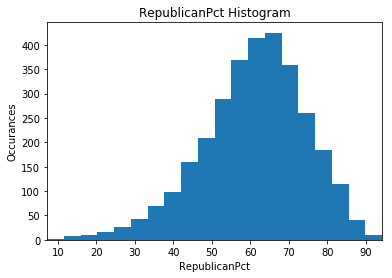

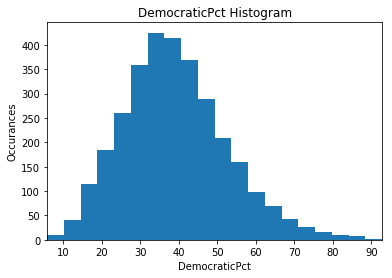

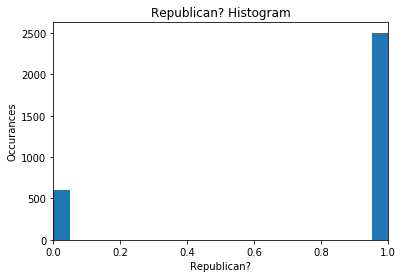

In [13]:
for i in range(3,26):
    plt.hist(final_df.iloc[:,i], bins=20)
    plt.title(final_df.columns[i] + ' Histogram')
    plt.ylabel('Occurances')
    plt.xlabel(final_df.columns[i])
    plt.xlim(final_df.iloc[:,i].min(), final_df.iloc[:,i].max())
    plt.show()


The last histogram of the "Republican?" column shows that a large majority of counties in the US vote Republican. This is an important piece of information for understanding the data.

Next, I created a pearson correlation matrix to understand how different variables were correlated. I represented this matrix as a heat-map to help visibility.

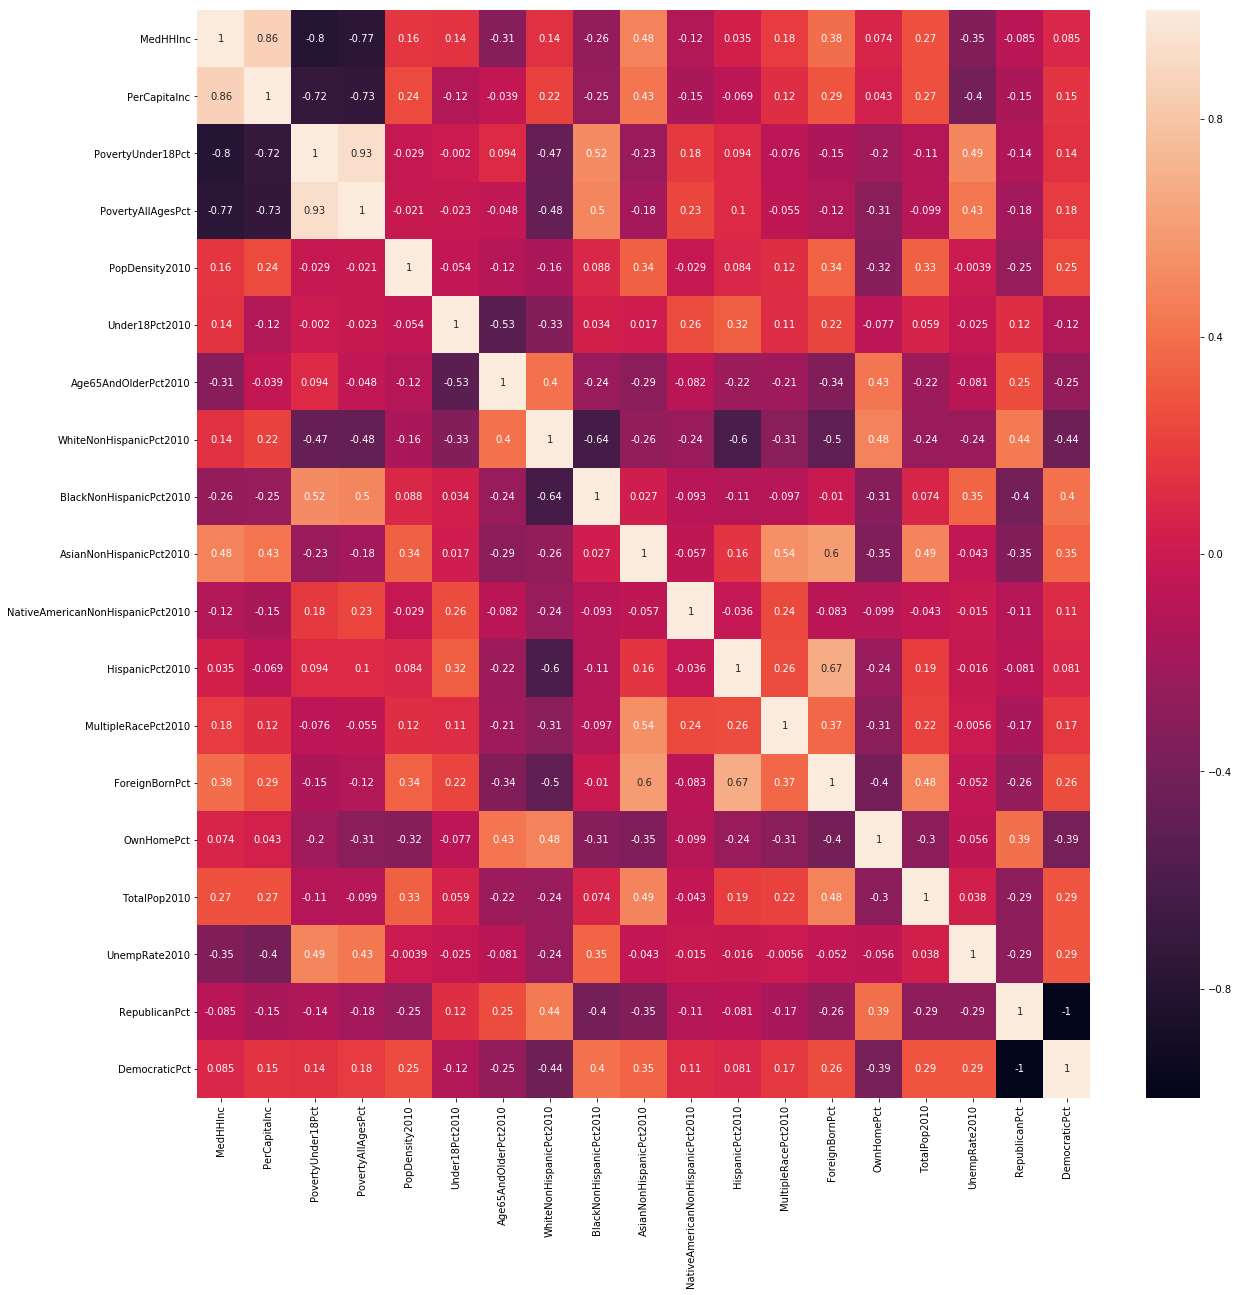

In [24]:
corrMatrix = final_df[ ['MedHHInc', 'PerCapitaInc', 'PovertyUnder18Pct', 'PovertyAllAgesPct',
                           'PopDensity2010', 'Under18Pct2010', 'Age65AndOlderPct2010', 
                           'WhiteNonHispanicPct2010', 'BlackNonHispanicPct2010',
                           'AsianNonHispanicPct2010', 'NativeAmericanNonHispanicPct2010',
                           'HispanicPct2010', 'MultipleRacePct2010', 'ForeignBornPct', 
                           'OwnHomePct', 'TotalPop2010', 'UnempRate2010', 'RepublicanPct',
                           'DemocraticPct'] ].corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"]=20,20
plt.show()

# Referenced: Source [2] & [3]

Using this matrix, I selected variables that are at least weakly associated with RepublicanPct. I used a threshold value of the absolute value of .25 to determine this.

In [15]:
associated_variables = ['PopDensity2010', 'Age65AndOlderPct2010', 'WhiteNonHispanicPct2010', 
             'BlackNonHispanicPct2010', 'AsianNonHispanicPct2010', 'ForeignBornPct',
             'OwnHomePct', 'TotalPop2010', 'UnempRate2010']

Next, I created linear models using the associated_variables columns as inputs and RepublicanPct as the output. This will provide me information about the strength of a linear relationship between the different variables and RepublicanPct. It also creates a scatterplot of the data and draws the best fit line.

*This function performs a linear regression. It then creates a scatterplot of the data and plots the best fit line calculated by the linear regression. It also prints the linear regression model's slope, y-intercept, and $ r^2 $ value.*

In [16]:
def linm(df, inputs, output):
    model = LinearRegression().fit(df[inputs], df[output])

    coef_strings = ["{:.2f}".format(coefficient) for coefficient in model.coef_]
    r2_score = model.score(df[inputs], df[output])
    
    predicted_ys = model.predict(df[inputs])
    plt.scatter(df[inputs], df[output])
    plt.plot(df[inputs], predicted_ys)
    plt.xlabel(inputs[0])
    plt.ylabel('RepublicanPct')
    plt.title(inputs[0] + ' vs. RepublicanPct')
    plt.show()
    
    print("coefficients: {} intercept: {:.2f};   r^2: {:.2f}"
      .format(", ".join(coef_strings), model.intercept_, r2_score))
    
    # Referenced: Source [1]

*This loop runs the above function on all the associated_variables. It inputs one variable column at a time and uses the RepublicanPct column as the output.*

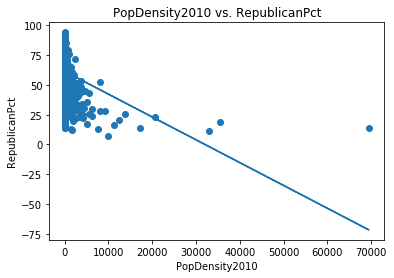

coefficients: -0.00 intercept: 61.45;   r^2: 0.06


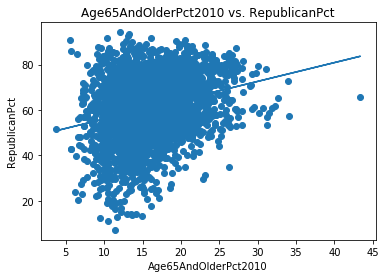

coefficients: 0.83 intercept: 47.75;   r^2: 0.06


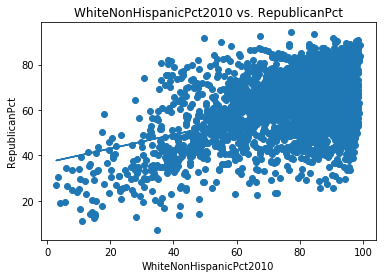

coefficients: 0.31 intercept: 36.85;   r^2: 0.20


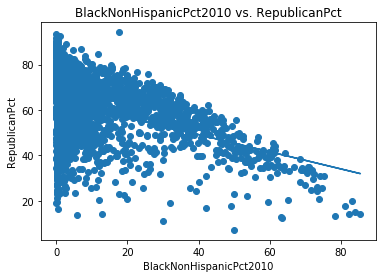

coefficients: -0.38 intercept: 64.28;   r^2: 0.16


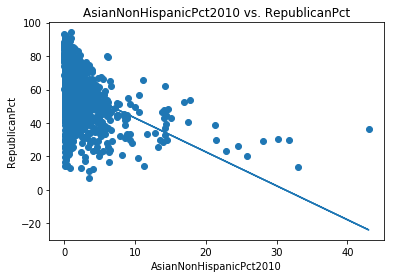

coefficients: -2.02 intercept: 63.17;   r^2: 0.12


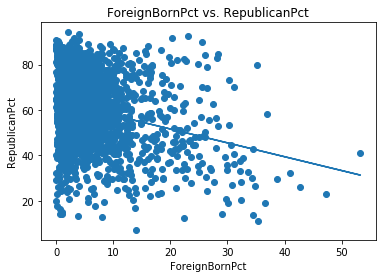

coefficients: -0.61 intercept: 63.81;   r^2: 0.07


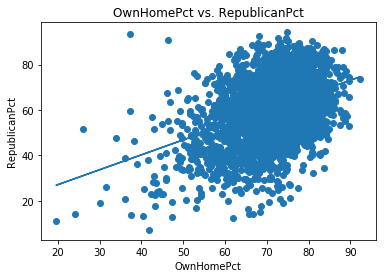

coefficients: 0.66 intercept: 13.95;   r^2: 0.15


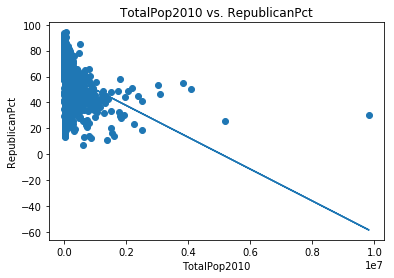

coefficients: -0.00 intercept: 62.16;   r^2: 0.08


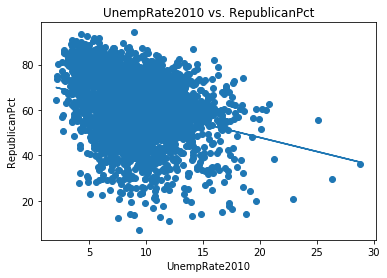

coefficients: -1.23 intercept: 72.47;   r^2: 0.08


In [17]:
for inp in associated_variables:
    linm(final_df, [inp], "RepublicanPct")

The plots and summary statistics show that linear regression is a poor model choice for predicting how Republican a county will vote. This is because there is no positive or negative association between the variables and RepublicanPct. This can be seen as almost $ r^2 $  values are close to zero.


I will now create a linear model using multiple regression to see how well it can predict the Republican percentage using the associated_variables. Because none of these variables are strongly correlated with each other, multi-colinearity should not influence it much.

In [18]:
model = LinearRegression().fit(final_df[['PopDensity2010', 'Age65AndOlderPct2010', 'WhiteNonHispanicPct2010', 
             'BlackNonHispanicPct2010', 'AsianNonHispanicPct2010', 'ForeignBornPct',
             'OwnHomePct', 'TotalPop2010', 'UnempRate2010']], final_df['RepublicanPct'])

coef_strings = ["{:.2f}".format(coefficient) for coefficient in model.coef_]
r2_score = model.score(final_df[ ['PopDensity2010', 'Age65AndOlderPct2010', 'WhiteNonHispanicPct2010', 
             'BlackNonHispanicPct2010', 'AsianNonHispanicPct2010', 'ForeignBornPct',
             'OwnHomePct', 'TotalPop2010', 'UnempRate2010'] ], final_df['RepublicanPct'])

print("coefficients: {} intercept: {:.2f};   r^2: {:.2f}"
  .format(", ".join(coef_strings), model.intercept_, r2_score))

coefficients: -0.00, -0.01, 0.12, -0.15, -1.39, 0.21, 0.25, -0.00, -0.79 intercept: 43.51;   r^2: 0.36


This model is slightly better than any of the previous ones now that it uses multiple variables. However, the $ r^2 $ value is still low. This shows that the linear model does not fit the data well and would not be a good predictor.

Therefore, I tried to use logistic regression instead. This logistic regression compared the associated_variables as inputs and the conditional "Republican?" column as the output. "The Republican?" column contains a 0 for no or a 1 for yes. 

*This function performs a logistic regression. It then creates a scatterplot of the data and plots the best fit line calculated by the logistic regression. It also prints the logistic regression model's slope, y-intercept, and $ r^2 $ value.*

In [19]:
def logit(x, coef, intercept):
    exp_x = np.exp(x * coef + intercept)
    return exp_x / (1 + exp_x)

# Referenced: Source [1]

In [20]:
def logm(df, inputs, output):
    model = LogisticRegression(solver='lbfgs').fit(df[inputs], df[output])
    
    predicted_ys = model.predict(df[inputs])
    plt.scatter(df[inputs], df[output])
    df[inputs] = np.sort(df[inputs])
    plt.plot(df[inputs], logit(df[inputs], model.coef_, model.intercept_),'x')
    plt.xlabel(inputs[0])
    plt.ylabel('Republican?')
    plt.title(inputs[0] + ' vs. Republican?')
    plt.show()
    
    print('The slope of the moodel is ' + str(model.coef_))
    print('The intercept of the model is '+ str(model.intercept_))

*This loop runs the above function on all the associated_variables. It inputs one variable column at a time and uses the RepublicanPct column as the output.*

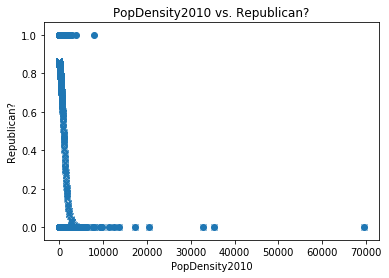

The slope of the moodel is [[-0.00192534]]
The intercept of the model is [1.83530019]


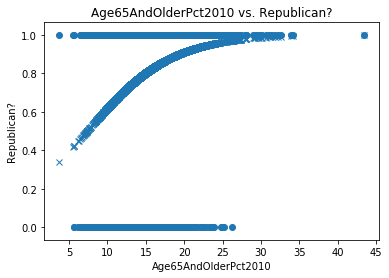

The slope of the moodel is [[0.18310076]]
The intercept of the model is [-1.3441946]


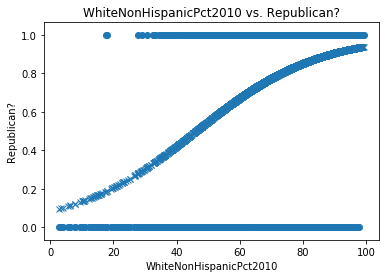

The slope of the moodel is [[0.05164283]]
The intercept of the model is [-2.38089182]


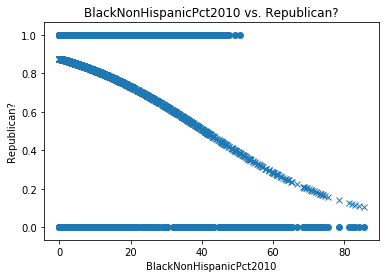

The slope of the moodel is [[-0.04804707]]
The intercept of the model is [1.95958409]


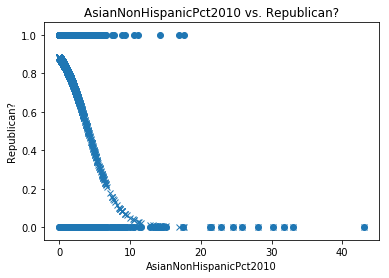

The slope of the moodel is [[-0.49710586]]
The intercept of the model is [2.01802842]


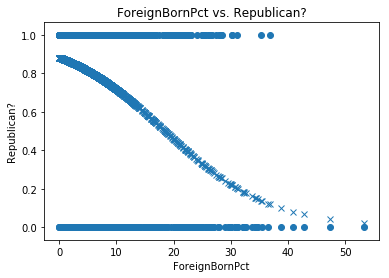

The slope of the moodel is [[-0.10890446]]
The intercept of the model is [2.01425534]


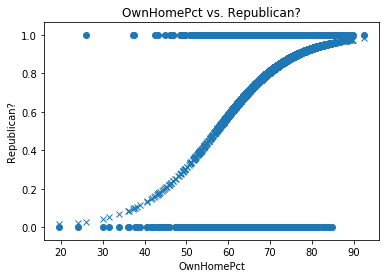

The slope of the moodel is [[0.11242905]]
The intercept of the model is [-6.42128706]


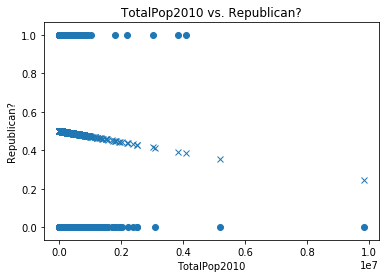

The slope of the moodel is [[-1.13515243e-07]]
The intercept of the model is [4.97524317e-11]


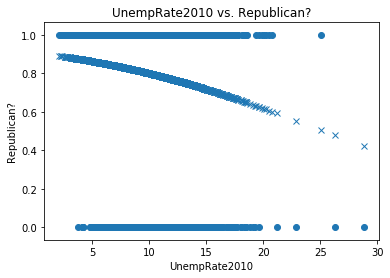

The slope of the moodel is [[-0.09062295]]
The intercept of the model is [2.29154524]


In [21]:
for inp in associated_variables:
    logm(final_df, [inp], 'Republican?')

These curves are not perfect but fit the data better than a linear model. They show that there is a relationship between these associated_variables and if a county voted majority Republican. These relationships are listed below.

 - As population density increases, counties are more likely to vote Democrat. This is seen in the sharp fall of in the logisitic regression line. Also, not a single county with a population density over 10,000 voted Republican

- As the percentage of people aged 65 and older increases, the county becomes more likely to vote Republican. Not a single county with a 65+ population of over 27% voted Democrat.

- As the percentage of white individuals increases, the county beocomes more likely to vote Republican. No counties with a population of white people below 18% voted Democratic.

- As the percentage of black individuals increases, the county becomes more likely to vote Democratic. No population with over 55% black individuals voted Republican.

- As the percentage of Asian individuals increases, the county becomes more likely to vote Democratic.

- As the percentage of forein born individuals increases, the county becomes more likely to vote Democratic.

- As the percentage of home owners increases, the county becomes more likely to vote Republican.

- As the total population increases, the county becomes more likely to vote Democratic.

- As the percentage of unemployed individuals increases, the county becomes more likely to vote Democratic.

**Evaluation of significance**

To evaluate significance, I ran a t-test on all the associaed_variables.

In [25]:
    final_df_rep = final_df[ final_df['Republican?'] == 1]
    final_df_dem = final_df[ final_df['Republican?'] == 0]
    for inp in associated_variables:    
        print('The p-value of the t-test for ' + inp + ' is ' + str(stats.ttest_ind(final_df_rep[inp], final_df_dem[inp])[1]))
        print('The difference between the Republican mean and Democratic mean for ' + inp + ' is ' + str(np.mean(final_df_rep[inp]) - np.mean(final_df_dem[inp])))
        print()
    # Referenced: Source [4]

The p-value of the t-test for PopDensity2010 is 3.443374856553717e-26
The difference between the Republican mean and Democratic mean for PopDensity2010 is -823.3677956721392

The p-value of the t-test for Age65AndOlderPct2010 is 2.8417707068467405e-44
The difference between the Republican mean and Democratic mean for Age65AndOlderPct2010 is 2.570745355286318

The p-value of the t-test for WhiteNonHispanicPct2010 is 2.8611619290064155e-142
The difference between the Republican mean and Democratic mean for WhiteNonHispanicPct2010 is 21.34826643047697

The p-value of the t-test for BlackNonHispanicPct2010 is 9.603708258302957e-85
The difference between the Republican mean and Democratic mean for BlackNonHispanicPct2010 is -12.403593629730393

The p-value of the t-test for AsianNonHispanicPct2010 is 1.0958083875512213e-78
The difference between the Republican mean and Democratic mean for AsianNonHispanicPct2010 is -1.9171007180590265

The p-value of the t-test for ForeignBornPct is 1.84967

Every single t-test completed has a significant p-value as they are all less than 0.05. This shows that there is a significant difference between Republicans and Democrats in terms of these factors. Additionally, I subtracted the republican mean from the democratic mean to show if Democrats or Republicans were the group with the larger mean. If Republicans had the larger mean, the difference is negative. If Democrats did, the difference is positive.

**Conclusion**

Through the data analysis, I calculated that there is a significant difference in the associated_variables between Republican voting counties and Democratic voting counties. However, I was unable to create a good model to predict future election turnouts based on these factors as the multiple regression model I used had a low $ r^2 $ value. Additionally, I found that a large majority of counties in the US vote Republican. However, the total number of votes remains close between Democrats and Republicans because more populated counties have a higher likelihood of voting Democratic.

Understanding the effect of these associated_variables is important for the upcoming presidential election. For example, if Joe Biden is to win this election, he must understand how different counties in the US vote for a party. This will allow him to optimize his campaigning by focusing only on Democrat and battleground counties that have a high chance of being won. To further investigate these relationships with the associated_variables, one could examine their variation in the last five elections.

**Source Code**

Github Link: https://github.com/tedeschi22/2950-Project

**Acknowledgments**

[1] David Mimno Class Notes (Cornell Univeristy Professor)

[2] https://datatofish.com/correlation-matrix-pandas/

[3] https://stackoverflow.com/questions/51416909/how-to-increase-the-size-of-jupyter-notebook-plot/51417061

[4] http://scipy-lectures.org/packages/statistics/index.html